# Problem Statement
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.                              
### Data Description:                    
    * Murder -- Muder rates in different places of United States                  
    * Assualt- Assualt rate in different places of United States                  
    * UrbanPop - urban population in different places of United States                   
    * Rape - Rape rate in different places of United States       

# Importing Necessary Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

# Importing Data

In [80]:
raw_data = pd.read_csv('crime_data.csv')
raw_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [81]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [82]:
raw_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# --------------------------------------Hierarchical Clustering-----------------------------------

### Select the Features

In [83]:
x = raw_data.drop('Unnamed: 0', axis = 1)

### Standardization

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

### Dendrogram

In [86]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [87]:
z = linkage(x_scaled, method="complete",metric="euclidean")

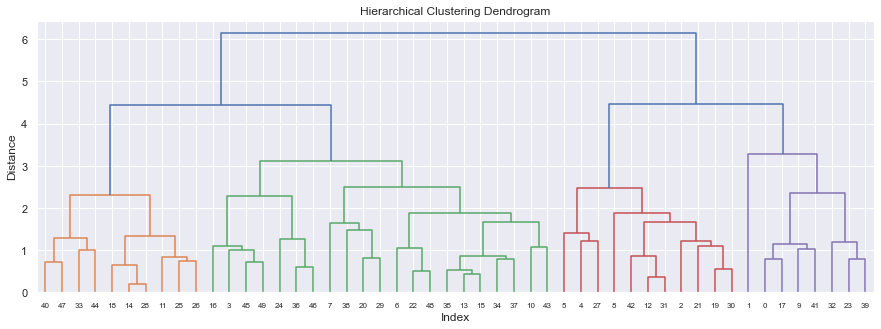

In [88]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0., leaf_font_size = 8.)  # rotates the x axis labels # font size for the x axis labels
plt.show()

### Agglomerative Clustering

In [89]:
from sklearn.cluster import  AgglomerativeClustering 
hierarchial = AgglomerativeClustering(n_clusters = 4, linkage ='complete', affinity = "euclidean").fit(x_scaled)

In [90]:
hierarchial.labels_

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [91]:
cluster_labels = pd.Series(hierarchial.labels_)
raw_data['hierarchial_clusters'] = cluster_labels 
raw_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hierarchial_clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [92]:
# getting aggregate mean of each cluster
raw_data.iloc[:,1:5].groupby(raw_data.hierarchial_clusters).mean()

,Murder,Assault,UrbanPop,Rape
hierarchial_clusters,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


# ---------------------------------------K-Means Clustering----------------------------------------

### Elbow Method for Optimal K

In [93]:
from sklearn.cluster import KMeans

In [94]:
wcss =[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[200.0,
 104.96163315756871,
 79.92170303159772,
 57.55425863091104,
 49.993842813267484,
 44.30972710102866,
 39.441867455271115,
 37.18055760415286,
 31.968401771411784]

Text(0, 0.5, 'WCSS')

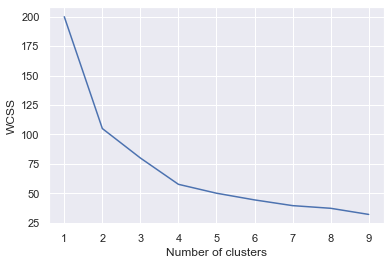

In [95]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [96]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(x_scaled)
    sil_score1= silhouette_score(x_scaled, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


### K-Means Modelling

In [97]:
kmeans =KMeans(4)
kmeans.fit(x_scaled)

KMeans(n_clusters=4)

In [98]:
kmeans.labels_ 

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [99]:
kmeans_labels = pd.Series(kmeans.labels_)   
raw_data['kmeans_clusters'] = kmeans_labels 
raw_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hierarchial_clusters,kmeans_clusters
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,2,1
3,Arkansas,8.8,190,50,19.5,1,3
4,California,9.0,276,91,40.6,2,1


In [100]:
# getting aggregate mean of each cluster
raw_data.iloc[:,1:5].groupby(raw_data.kmeans_clusters).mean()

,Murder,Assault,UrbanPop,Rape
kmeans_clusters,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.815385,257.384615,76.000000,33.192308
2,5.656250,138.875000,73.875000,18.781250
3,13.937500,243.625000,53.750000,21.412500


# ---------------------------------DBSCAN Clustering-------------------------------------------

In [101]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.1, min_samples=3)
dbscan.fit(x_scaled)

DBSCAN(eps=1.1, min_samples=3)

In [102]:
# Noisy Samples arer labelled as -1
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [103]:
dbscan_labels = pd.Series(dbscan.labels_)
raw_data['dbscan_clust'] = dbscan_labels 
raw_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hierarchial_clusters,kmeans_clusters,dbscan_clust
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,2,1,1
3,Arkansas,8.8,190,50,19.5,1,3,2
4,California,9.0,276,91,40.6,2,1,-1


In [104]:
raw_data.iloc[:,1:5].groupby(raw_data.dbscan_clust).mean()

,Murder,Assault,UrbanPop,Rape
dbscan_clust,,,,
-1,10.066667,261.333333,75.000000,36.250000
0,14.671429,251.285714,54.285714,21.685714
1,11.014286,262.571429,77.142857,28.800000
2,4.973333,112.433333,63.566667,16.356667


# Interpretation
### Optimal Number of Clusters for the Crime Data are 4 as found by Elbow Method in K-Means Model

    Cluster 1  -  Low  Crime Rate in Low  Urban Population Cities                      
    Cluster 2  -  Low  Crime Rate in High Urban Population Cities
    Cluster 3  -  High Crime Rate in Low  Urban Population Cities
    Cluster 4  -  High Crime Rate in High Urban Population Cities

In [124]:
raw_data['kmeans_clusters'].value_counts()

2    16
1    13
0    13
3     8
Name: kmeans_clusters, dtype: int64

In [125]:
cluster_count = pd.DataFrame({'No. of Cities':[13,13,16,8], 'Cluster':[1,2,3,4]})

In [126]:
cluster_count

,No. of Cities,Cluster
0,13,1
1,13,2
2,16,3
3,8,4


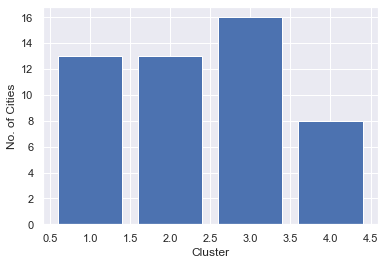

In [136]:
plt.bar(x = cluster_count['Cluster'], height= cluster_count['No. of Cities'])
plt.xlabel('Cluster')
plt.ylabel('No. of Cities')
plt.show()